# Evaluation for classification

<h3>Preamble

In [60]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

datasets = load_digits()
X, y = datasets.data, datasets.target

for class_name, class_count in zip(datasets.target_names, np.bincount(datasets.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [3]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('original labels:\t', y[1:30])
print('new binary labels:\t', y_binary_imbalanced[1:30])

original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
new binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [4]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [5]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced,
                                                   random_state = 0)
svm = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train)
svm.score(X_test, y_test)

/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9088888888888889

<h3>Dummy classifier

In [8]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

y_dummy_prediction = dummy_majority.predict(X_test)

y_dummy_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [10]:
svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

<h3>Confusion Matrices

<h4>binary (two-class) confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [12]:
dummy_classprop = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)

y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n',
     confusion)

Random class-proportional prediction (dummy classifier)
 [[367  40]
 [ 41   2]]


In [13]:
svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

In [14]:
print('Support vector machine classifier (linear kernel, C = 1)\n',
     confusion)

Support vector machine classifier (linear kernel, C = 1)
 [[402   5]
 [  5  38]]


In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


<h3>Evaluation metrics for binary classification

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuarcy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuarcy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [22]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

   micro avg       0.95      0.95      0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [23]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.90      0.90       407
           1       0.05      0.05      0.05        43

   micro avg       0.82      0.82      0.82       450
   macro avg       0.47      0.47      0.47       450
weighted avg       0.82      0.82      0.82       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

   micro avg       0.98      0.98      0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.86      0.86      0.86        43

   micro avg       0.97      0.97      0.97       450
   macro avg       0.92      0.92      0.92       450
weighted avg 

<h3>Decision functions

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[(0, -23.17711236290324),
 (0, -13.541470729541413),
 (0, -21.72290098969473),
 (0, -18.907438437430027),
 (0, -19.73582172900229),
 (0, -9.749807819560061),
 (1, 5.2349604859009276),
 (0, -19.307551661127864),
 (0, -25.101182889530396),
 (0, -21.82736239135058),
 (0, -24.151343401889438),
 (0, -19.576969790071697),
 (0, -22.574689400560423),
 (0, -10.823324268750714),
 (0, -11.912123406737392),
 (0, -10.97922371337485),
 (1, 11.206006114721543),
 (0, -27.64600231793191),
 (0, -12.859381428186682),
 (0, -25.848764845244997)]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, 
                                                   random_state = 0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20, 1]))

# show the probability of positive class for first 20 instances
y_proba_list

/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[(0, 8.59622935435435e-11),
 (0, 1.3152654562877047e-06),
 (0, 3.680136853269112e-10),
 (0, 6.146159365768372e-09),
 (0, 2.684364743208678e-09),
 (0, 5.8302468525539246e-05),
 (1, 0.9947011919630767),
 (0, 4.119427394145904e-09),
 (0, 1.2551475474865303e-11),
 (0, 3.3151024835512065e-10),
 (0, 3.244926244767743e-11),
 (0, 3.1465167386169614e-09),
 (0, 1.5701348842784633e-10),
 (0, 1.9928808739415592e-05),
 (0, 6.7085339693943354e-06),
 (0, 1.7052039108840334e-05),
 (1, 0.9999864078713285),
 (0, 9.851304579070747e-13),
 (0, 2.6015997081086803e-06),
 (0, 5.943250884839227e-12)]

<h3> Precision recall curves

<IPython.core.display.Javascript object>


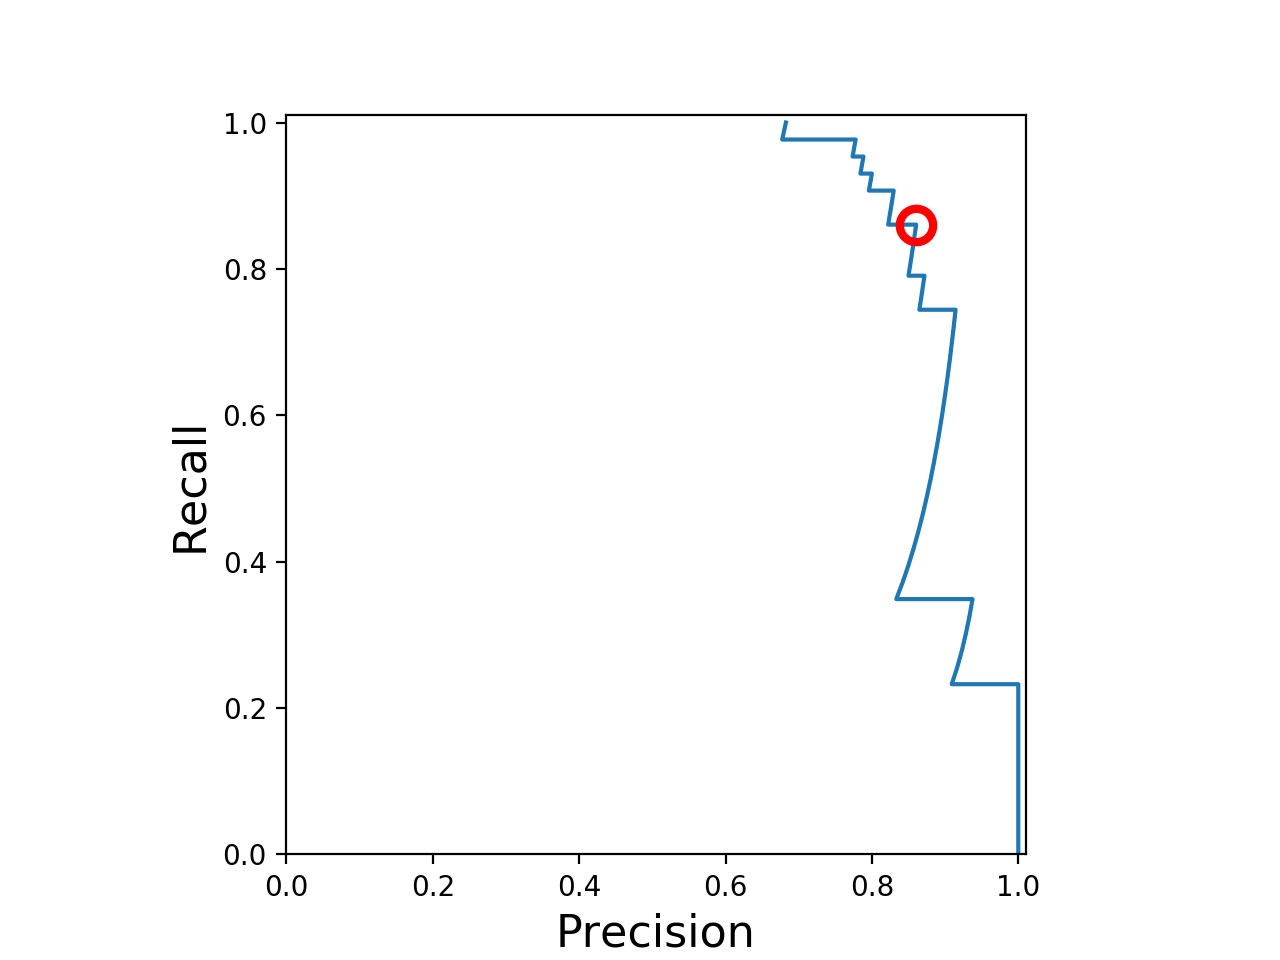

20
[-4.04803574 -3.93667242 -3.48717485 -3.44800195 -3.34287934 -2.57445087
 -2.3764742  -2.34828463 -2.30140515 -2.15840359 -2.03778005 -1.87217553
 -1.75310972 -1.72748008 -1.68509808 -1.48134611 -1.34026094 -1.30319866
 -1.08198757 -0.56678032  0.13115969  0.17428891  0.47495697  0.63936383
  1.0051027   1.33622205  1.68340892  1.69829293  1.88008137  2.19069822
  2.43522556  2.55294412  3.72030411  3.8071421   4.21200121  4.25136891
  4.3063296   4.31521932  4.55491196  4.57010095  4.93274183  5.23496049
  5.73362239  6.12956752  6.55481526  6.87018495  6.93001183  7.21946762
  7.37421383  7.81049381  8.26283234  8.39750203  8.4575643   9.84762367
  9.87275882 10.20082651 11.20600611 11.48231118 11.55003535 11.68156736
 13.25905795 14.73777148 16.02846252]


/Users/ritik/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [39]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label = 'Precision-recall curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none',
        c = 'r', mew = 3)
plt.xlabel('Precision', fontsize = 16)
plt.ylabel('Recall', fontsize = 16)
plt.axes().set_aspect('equal')
plt.show()
print(closest_zero)
print(thresholds)


<h3>ROC curves, Area-Under-Curve(AUC)

/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


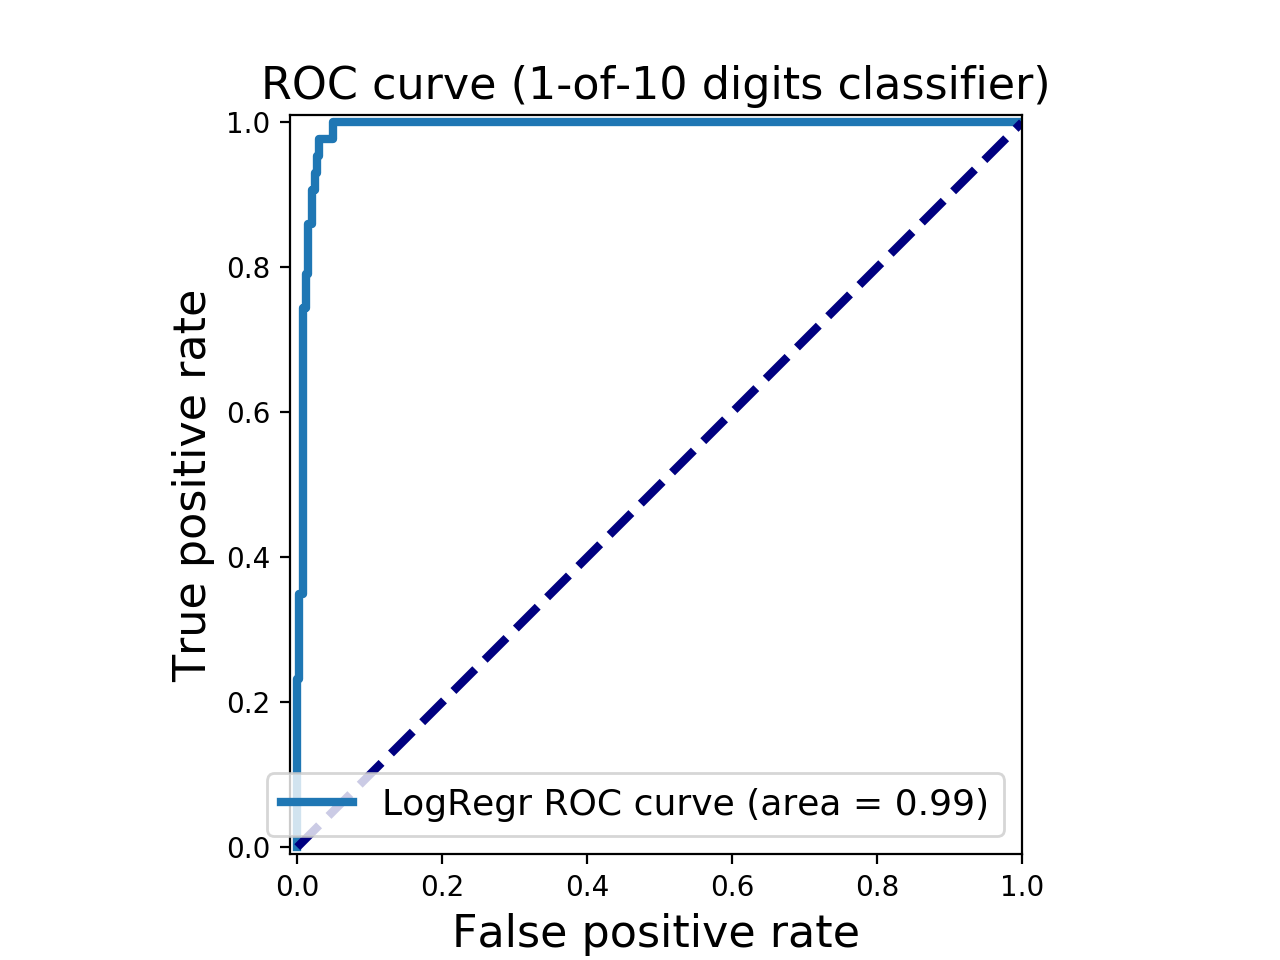

[ 17.02846252  16.02846252   9.84762367   8.4575643    7.21946762
   6.87018495   1.88008137   1.68340892   1.0051027    0.63936383
   0.13115969  -1.08198757  -1.34026094  -1.68509808  -1.72748008
  -1.75310972  -1.87217553  -2.03778005  -2.15840359  -3.93667242
  -4.04803574 -43.20820599]


/Users/ritik/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [40]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw = 3, label = 'LogRegr ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.xlabel('False positive rate', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 13)
plt.plot([0,1], [0,1], color = 'navy', lw = 3, linestyle = '--')
plt.axes().set_aspect('equal')
plt.show()
print(thresholds)



<IPython.core.display.Javascript object>


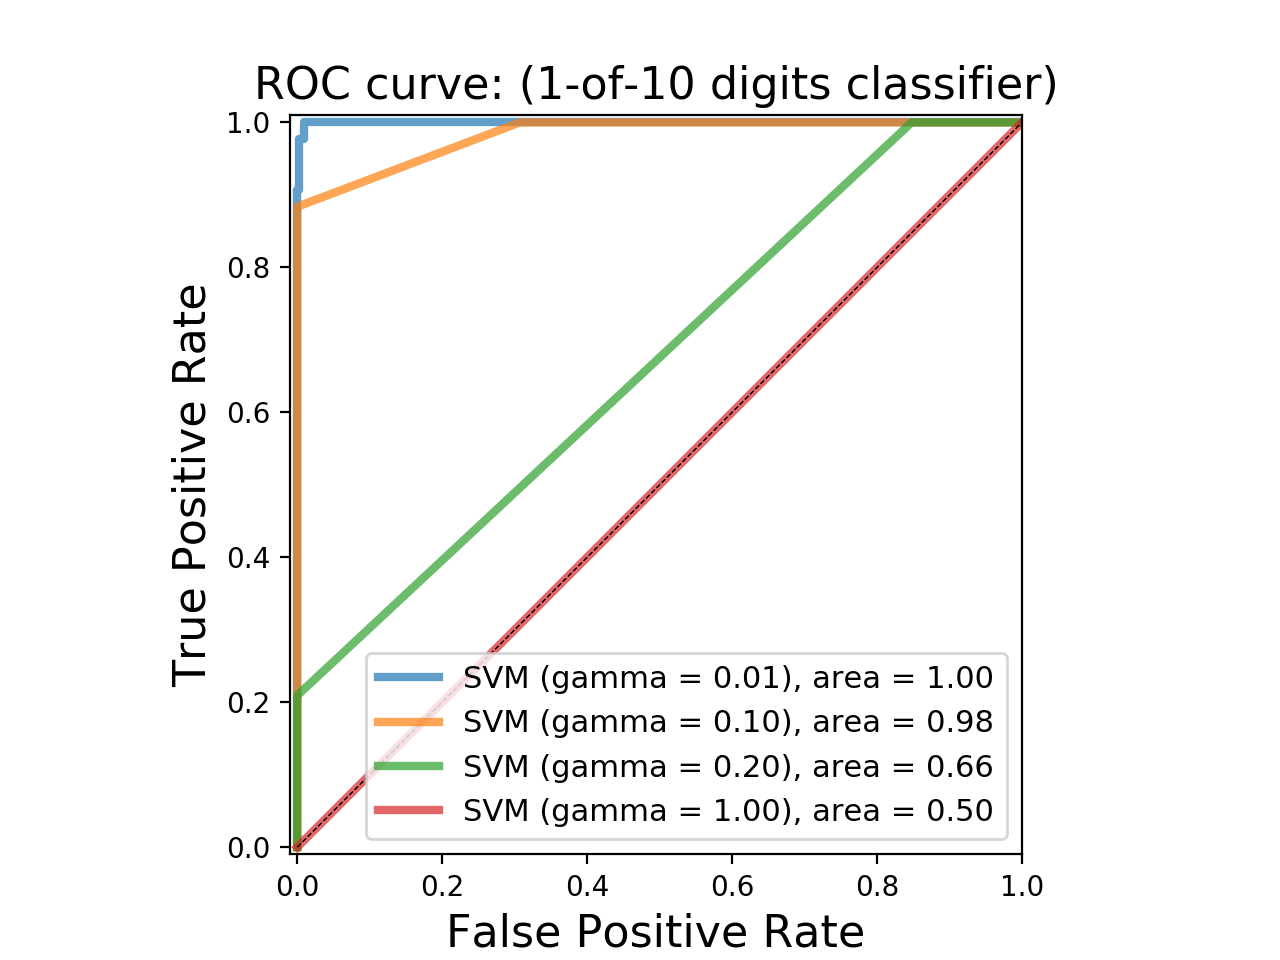

gamma = 0.01  accuarcy = 0.91  AUC = 1.00
gamma = 0.10  accuarcy = 0.90  AUC = 0.98
gamma = 0.20  accuarcy = 0.90  AUC = 0.66
gamma = 1.00  accuarcy = 0.90  AUC = 0.50


/Users/ritik/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [44]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma = g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print('gamma = {:.2f}  accuarcy = {:.2f}  AUC = {:.2f}'.format(g, accuracy_svm, 
                                                                  roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw = 3, alpha = 0.7,
            label = 'SVM (gamma = {:.2f}), area = {:.2f}'.format(g, roc_auc_svm))
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.plot([0,1], [0,1], color = 'k', lw = 0.5, linestyle = '--')
plt.legend(loc = 'lower right', fontsize = 11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize = 16)
plt.axes().set_aspect('equal')

plt.show()

<h3>Evaluation measures for multi-class classification

<h4>Multi-class confusion matrix

<IPython.core.display.Javascript object>


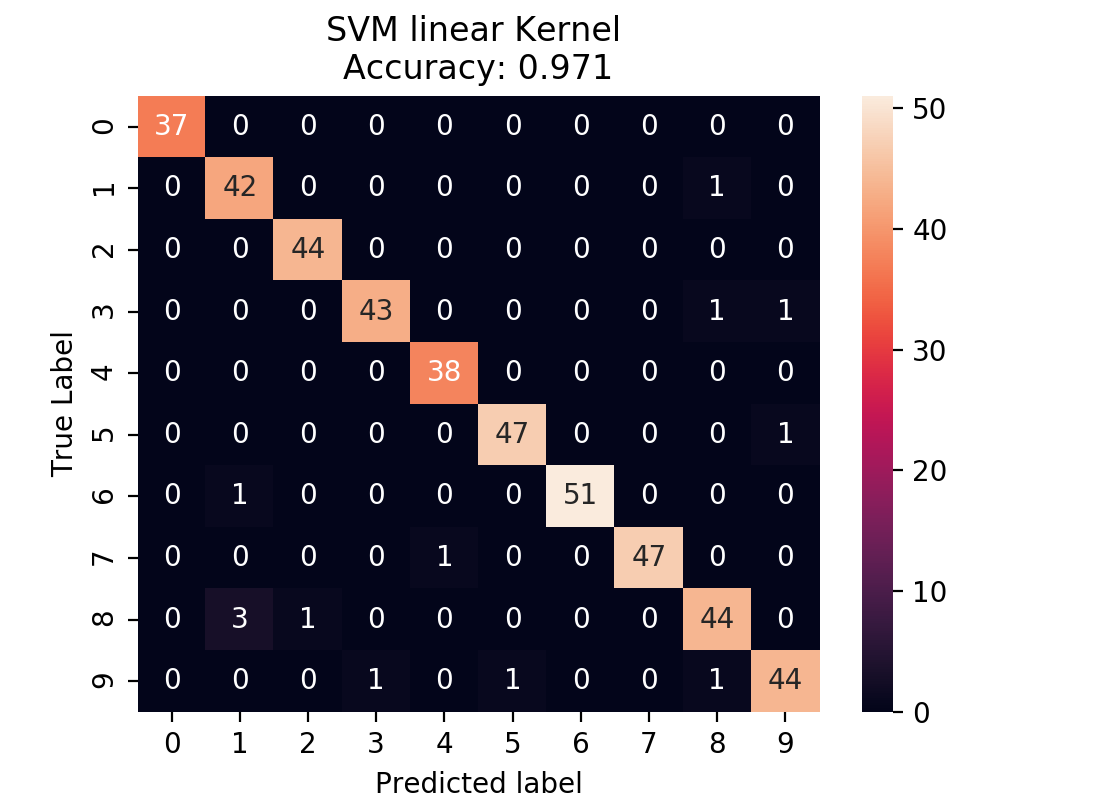

Text(0.5, 14.722222222222216, 'Predicted label')

In [45]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y,
                                                               random_state = 0)

svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                    index = [i for i in range(0,10)], columns = [i for i in range(0, 10)])

plt.figure(figsize = (5.5, 4))
sns.heatmap(df_cm, annot = True)
plt.title('SVM linear Kernel \nAccuracy: {:.3f}'.format(accuracy_score(y_test_mc, 
                                                                      svm_predicted_mc)))
plt.ylabel('True Label')
plt.xlabel('Predicted label')

/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


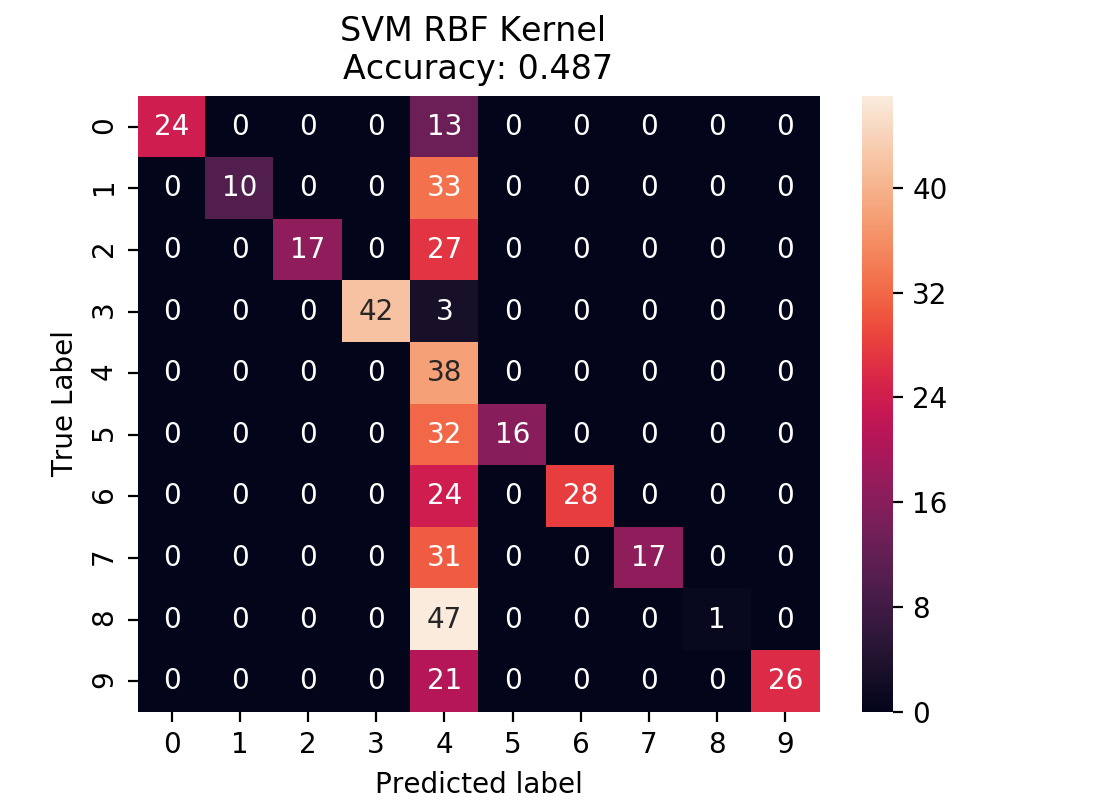

Text(0.5, 14.722222222222216, 'Predicted label')

In [43]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y,
                                                               random_state = 0)

svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                    index = [i for i in range(0,10)], columns = [i for i in range(0, 10)])

plt.figure(figsize = (5.5, 4))
sns.heatmap(df_cm, annot = True)
plt.title('SVM RBF Kernel \nAccuracy: {:.3f}'.format(accuracy_score(y_test_mc, 
                                                                      svm_predicted_mc)))
plt.ylabel('True Label')
plt.xlabel('Predicted label')

<h4> Multi class classification report 

In [46]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

   micro avg       0.97      0.97      0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



<h4>Micro vs macro averaged metrics

In [47]:
print('Micro averaged preicsion = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
     .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro averaged preicsion = 0.97 (treat instances equally)
Macro-averaged precision = 0.97 (treat classes equally)


In [48]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.97 (treat instances equally)
Macro-averaged f1 = 0.97 (treat classes equally)


<h3>Regression Evaluation Metrics

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


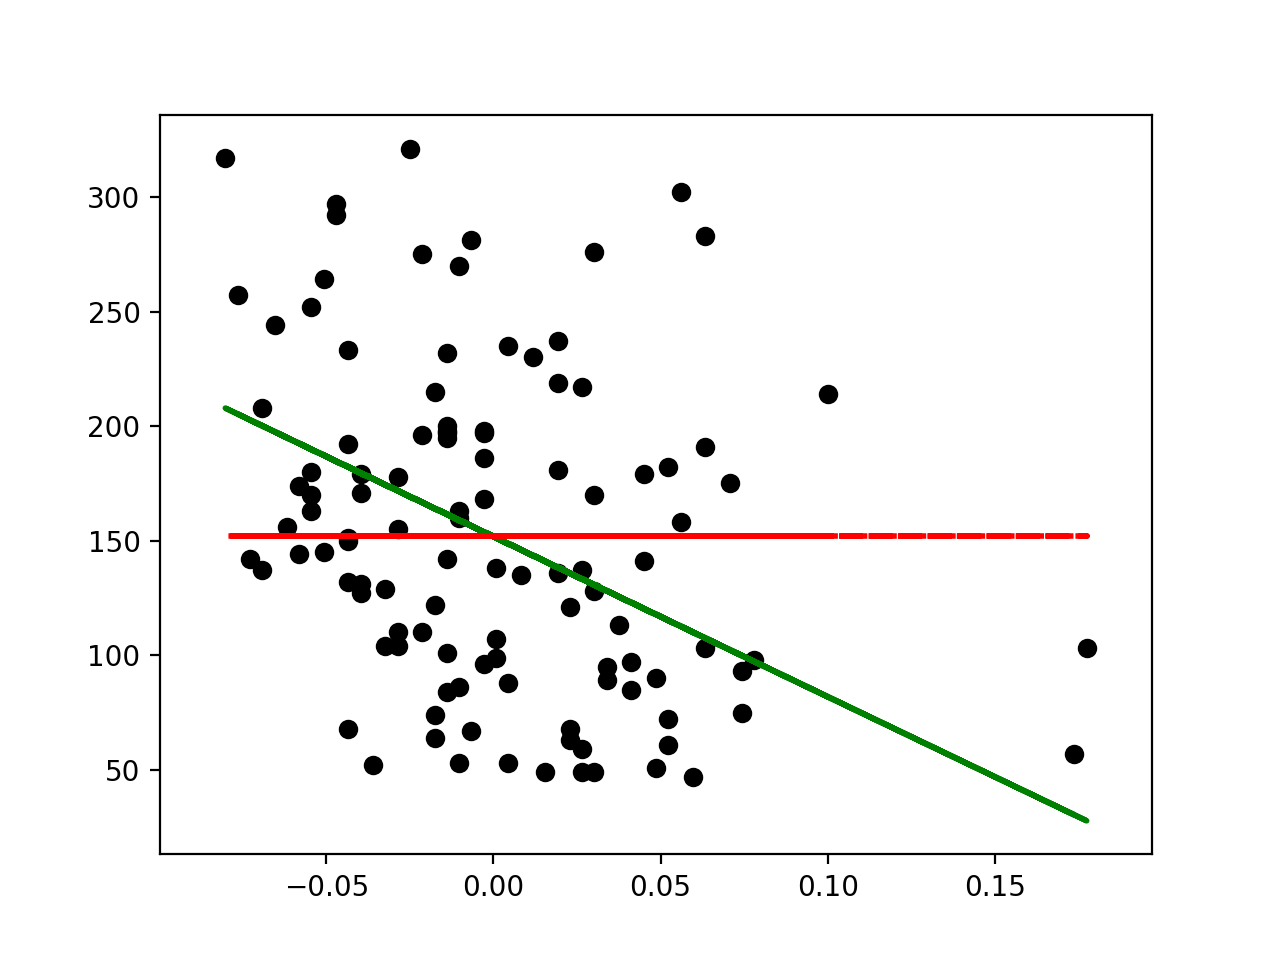

In [64]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print('Mean squared error (dummy): {:.2f}'.format(mean_squared_error(y_test, 
                                                                    y_predict_dummy_mean)))
print('Mean squared error (linear model): {:.2f}'.format(mean_squared_error(
y_test, y_predict)))
print('r2_score (dummy): {:.2f}'.format(r2_score(y_test, y_predict_dummy_mean)))
print('r2_score (linear model): {:.2f}'.format(r2_score(y_test, y_predict)))

plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, y_predict, color = 'green', linewidth = 2)
plt.plot(X_test, y_predict_dummy_mean, color = 'red', linestyle = 'dashed',
        linewidth = 2, label = 'dummy')

plt.show()

<h3>Model Selection using Evaluation Metrics

<h4>Cross-Validation Example

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()

X, y = dataset.data, dataset.target == 1
clf = SVC(kernel = 'linear', C = 1)

print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv = 5))
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv = 5, scoring = 'roc_auc'))
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv = 5, scoring = 'recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


<h3>Grid Search example

In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9962880475129918


/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.9998741278302142


<IPython.core.display.Javascript object>


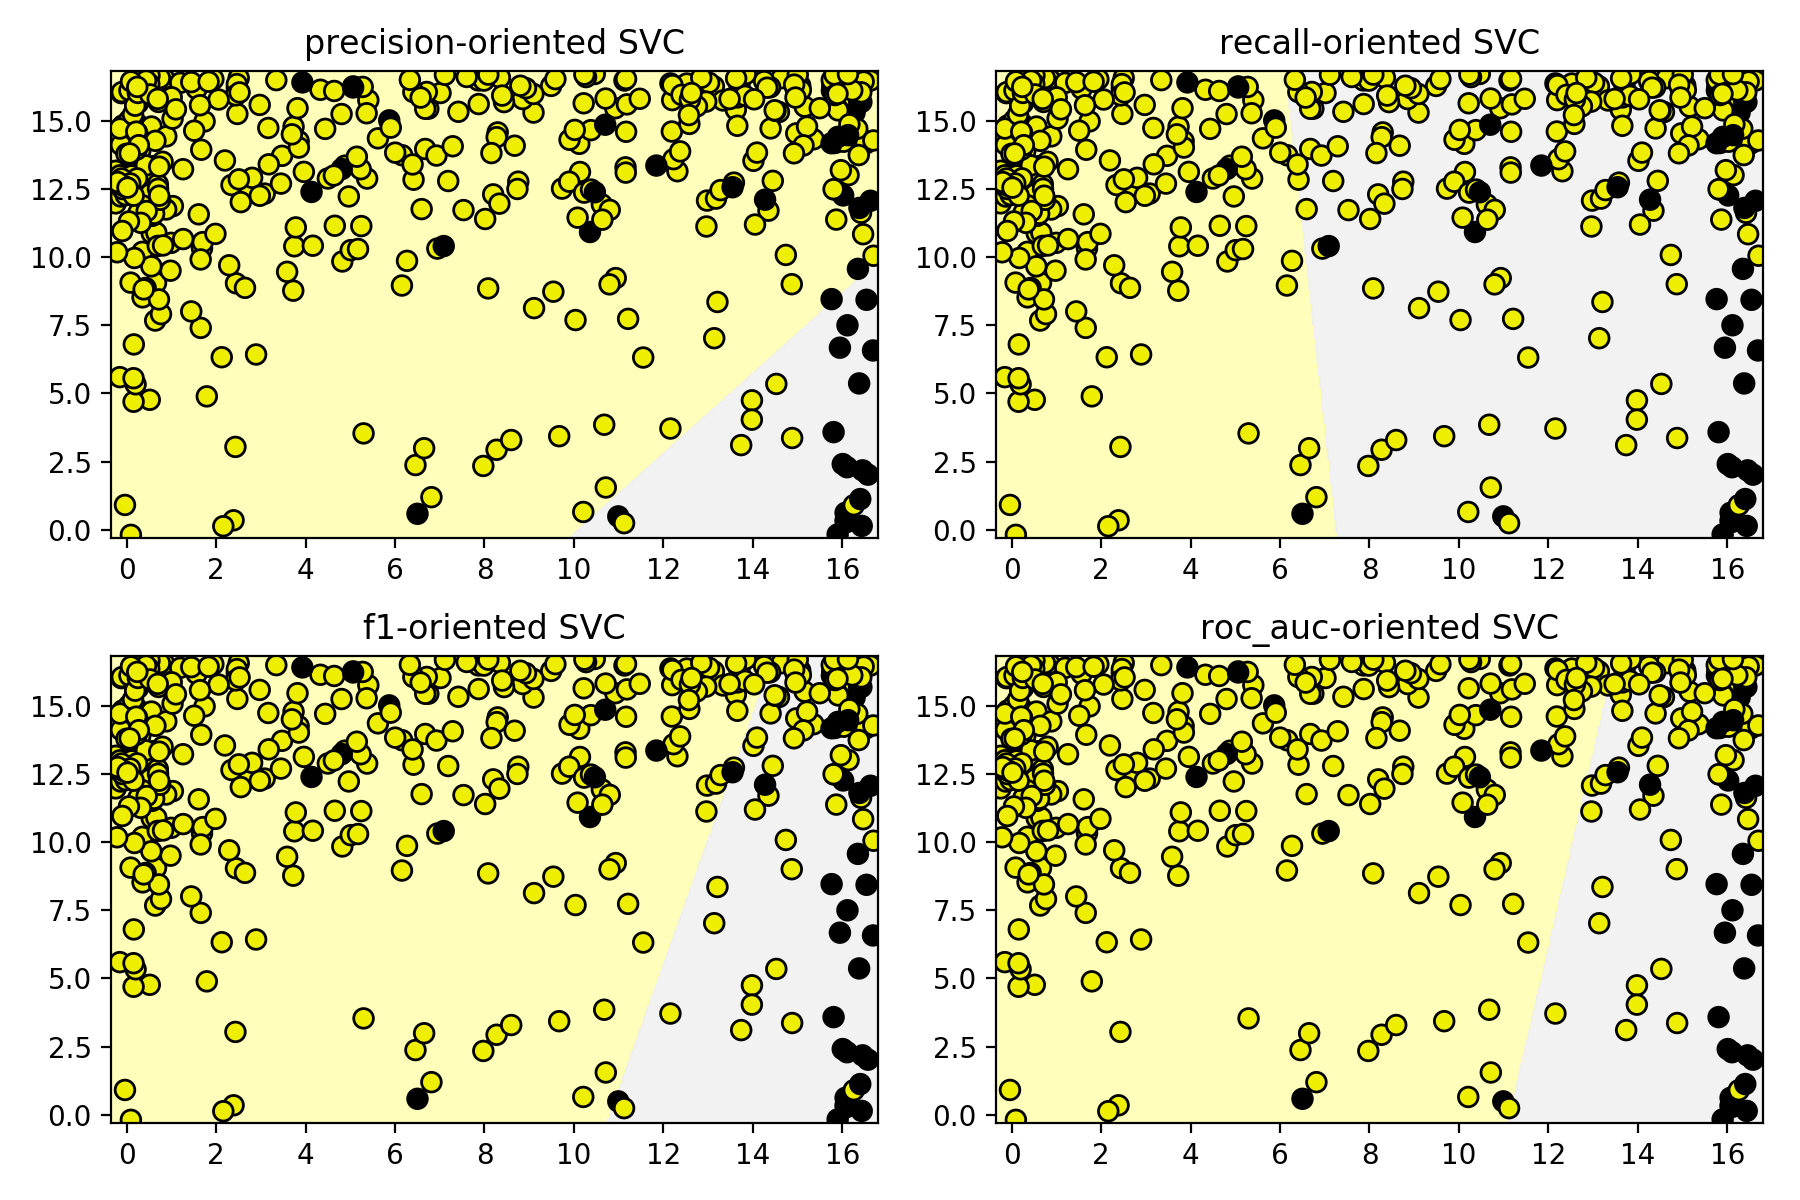

/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.538642826813942


/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9428915594801756


/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. f1): {'class_weight': {1: 4}}
Grid best score (f1): 0.5071952163553571


/Users/ritik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Grid best parameter (max. roc_auc): {'class_weight': {1: 5}}
Grid best score (roc_auc): 0.8895098144717111


In [71]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {}): {}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

In [70]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
